In [22]:
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap
    

import warnings
warnings.filterwarnings("ignore")

In [23]:
clf = joblib.load('../models-dump/logistic-regression/a83_f86.pkl')
df_train = pd.read_csv('../data/preprocessed/train-validation/drp_XOHE_scld.csv')
X = df_train.loc[:, df_train.columns != 'Target']

                                 Feature  Coefficient    Odds Ratio
103            Father's qualification_16   -15.410602  2.028899e-07
208           Daytime/evening attendance    15.094747  3.593893e+06
27                              Course_3    14.335711  1.682365e+06
216  Curricular units 2nd sem (approved)    13.453342  6.961651e+05
41                             Course_17    13.447617  6.921908e+05
95              Father's qualification_8   -13.408776  1.501906e-06
107            Father's qualification_20   -11.803775  7.476284e-06
170               Father's occupation_17   -11.239688  1.314213e-05
136               Mother's occupation_15    10.579269  3.931138e+04
120            Father's qualification_33     8.936309  7.603081e+03


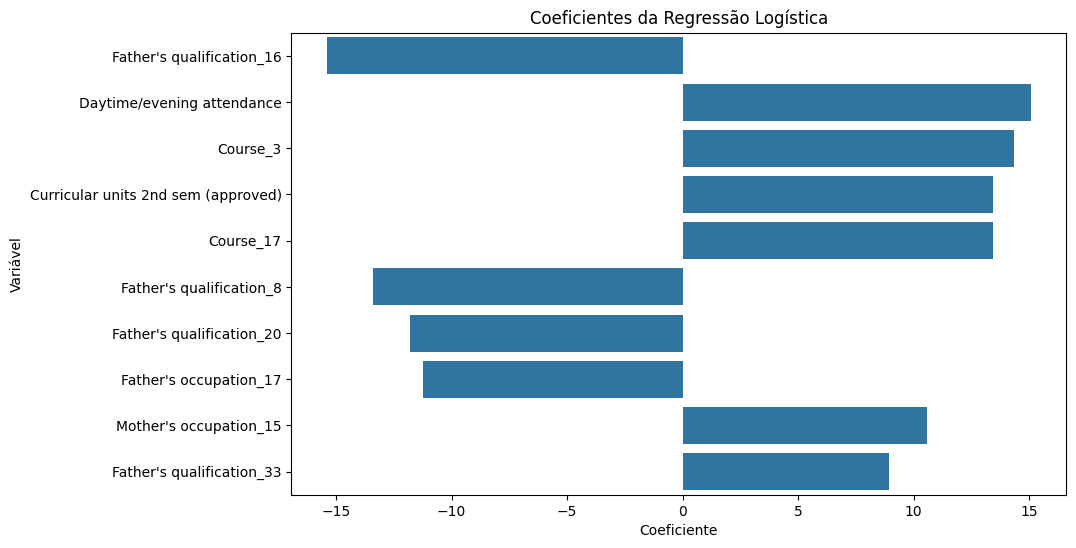

In [24]:
coef = clf.coef_[0]

# Odds ratios
odds_ratios = np.exp(coef)

# Criar um DataFrame para melhor visualização
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coef,
    'Odds Ratio': odds_ratios
})

coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

top_10_coef_df = coef_df.head(10)

# Mostrar o DataFrame de coeficientes
print(top_10_coef_df)

# Plotar os coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_10_coef_df)
plt.title('Coeficientes da Regressão Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

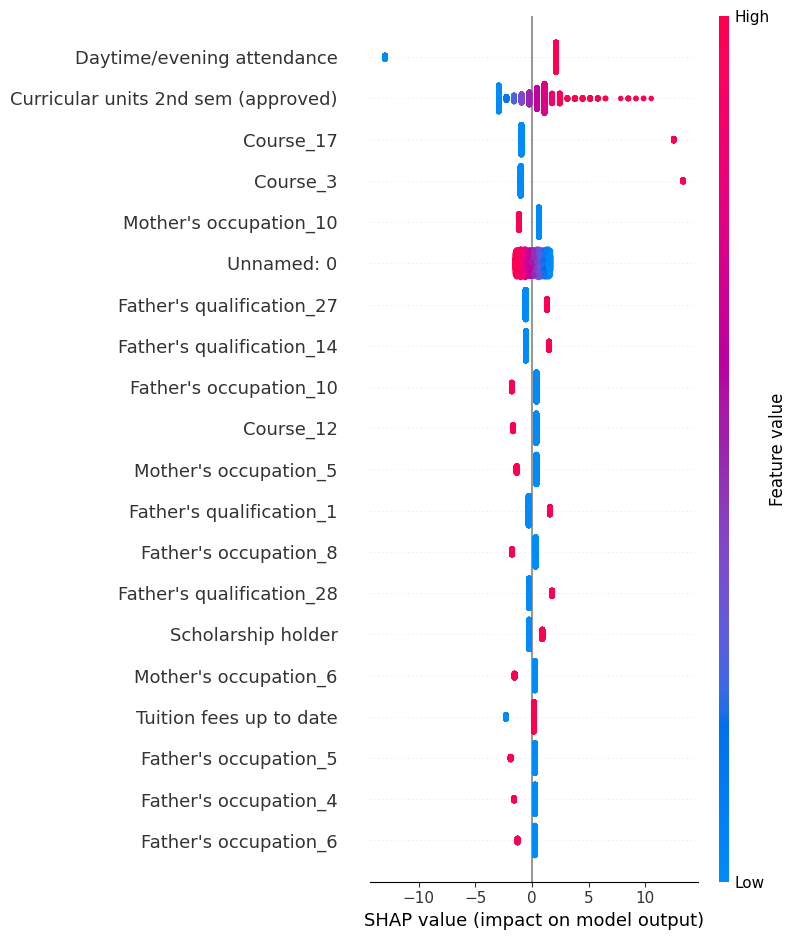

In [25]:
explainer = shap.Explainer(clf, X)
shap_values = explainer(X)

# Resumo dos valores SHAP
shap.summary_plot(shap_values, X)